In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random 
import os 
from PIL import Image
import glob

ls: cannot access '/home/kalyan/DataSets/cats&dogs': No such file or directory


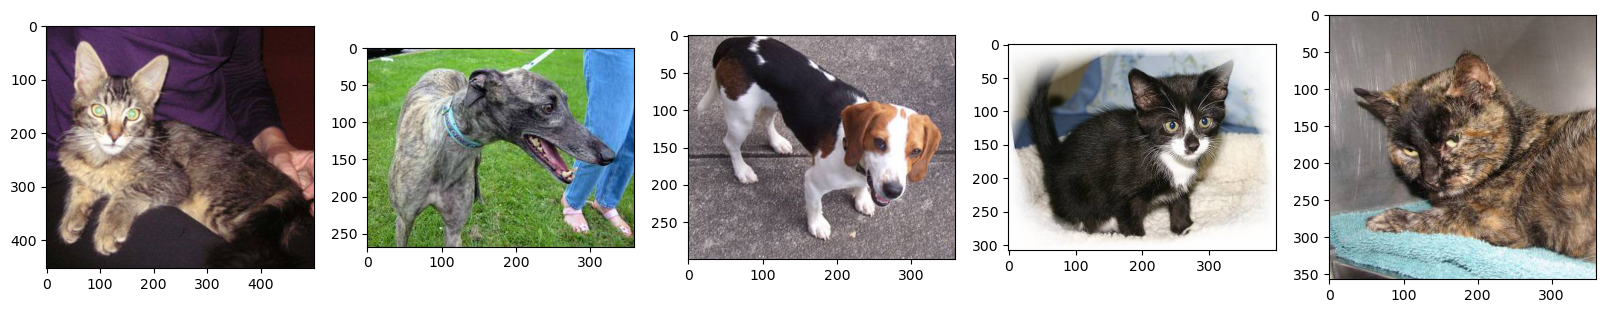

Found 6400 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.
Class Indices:  {'cat': 0, 'dog': 1}


In [4]:
datapath = "/home/kalyan/DataSets/Dogs&Cats/"
!ls /home/kalyan/DataSets/cats\&dogs

#let's look at any 5 files in the in train folder
train_files = os.listdir(datapath+"train/")
#subplots
fig ,ax = plt.subplots(1,5,figsize=(20,20))
for i in range(5):
    img = Image.open(datapath+"train/"+train_files[i])
    ax[i].imshow(img)
    ax[i].axis('on')
plt.show()
train_files = glob.glob(datapath+"train/*")
train_labels = [i.strip(datapath+"train/")[:3] for i in train_files]
train_df = pd.DataFrame({'filename':train_files,'label':train_labels})
train_df.head()

nb_classes = len(glob.glob(datapath+"train/*"))
train_datagen = ImageDataGenerator(
    rotation_range=5,
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2)

# create a image data generator object. 
# all these are data augmentation parameters.

# now let's specify the image size to which each image will be resized to
img_height, img_width = 224, 224
batch_size = 32
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_size,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=batch_size,
    subset='validation')

print("Class Indices: ",train_generator.class_indices)
y_train = [i.strip(datapath+"train/")[:3] for i in train_files]
X = train_files

In [5]:
import cv2
import pywt
#taking dwt of the images in the path
def dwt(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224, 224))
    coeffs2 = pywt.dwt2(img, 'haar')
    LL, (LH, HL, HH) = coeffs2
    return LL


In [6]:
#passing the path of the images to dwt function
X = [dwt(i) for i in X]
X = np.array(X)
X.shape

(8000, 112, 112)

In [7]:
#list to ndarray
y_train = [i.strip(datapath+"train/")[:3] for i in train_files]
y_train = np.array(y_train)
print(X.shape)
print(y_train.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#reshaping the data into 2d using ravel
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.reshape(1, y_train.shape[0]).T
y_test = y_test.reshape(1, y_test.shape[0]).T
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)


(8000, 112, 112)
(8000,)
(6400, 112, 112)
(1600, 112, 112)
(6400,)
(1600,)
(6400, 12544)
(1600, 12544)
(6400, 1)


In [8]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ",knn.score(X_test, y_test))

Accuracy:  0.54625


In [9]:
import lazypredict 
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [51:32<00:00, 106.65s/it] 


In [10]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.64,0.64,None,0.64,82.92
ExtraTreesClassifier,0.62,0.62,None,0.62,17.28
SVC,0.62,0.62,None,0.62,347.50
RandomForestClassifier,0.62,0.62,None,0.61,47.31
NuSVC,0.61,0.61,None,0.61,370.98
AdaBoostClassifier,0.58,0.58,None,0.58,276.19
GaussianNB,0.58,0.58,None,0.57,3.44
BaggingClassifier,0.57,0.57,None,0.57,495.41
ExtraTreeClassifier,0.55,0.55,None,0.55,2.83
